__knihovna pandas - ukázkový příklad 2__

In [2]:
# import všech nutných modulů
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# zobrazení verze Python
import sys

# zobrazení verze Matplotlib
import matplotlib

# inline plotting
%matplotlib inline

In [3]:
# základní set (Python list)
jmena = ['Marie', 'Jiří', 'Jan', 'Jana', 'Petra']

modul random - pseudo random generator

In [4]:
random.seed(500)
random_jmena = [jmena[random.randint(low = 0,high = len(jmena))] for i in range(1000)]

In [5]:
# zobrazení prvních 10 řádků
random_jmena[:10]

['Jan', 'Jiří', 'Jiří', 'Marie', 'Jiří', 'Jiří', 'Jiří', 'Jan', 'Jan', 'Jan']

In [6]:
# piužití knihovny NumPy pro generování čísel
pocet = [random.randint(low=0,high=1000) for i in range(1000)]
pocet[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [7]:
# náhodně generované záznamy spojíme pomocí zip()
JmenaDataSet = list(zip(random_jmena, pocet))
JmenaDataSet[:10]

[('Jan', 968),
 ('Jiří', 155),
 ('Jiří', 77),
 ('Marie', 578),
 ('Jiří', 973),
 ('Jiří', 124),
 ('Jiří', 155),
 ('Jan', 403),
 ('Jan', 199),
 ('Jan', 191)]

In [8]:
data_frame = pd.DataFrame(data = JmenaDataSet, columns = ['Jméno', 'Počet'])
data_frame[:20]

,Jméno,Počet
0,Jan,968
1,Jiří,155
2,Jiří,77
3,Marie,578
4,Jiří,973
5,Jiří,124
6,Jiří,155
7,Jan,403
8,Jan,199
9,Jan,191


Export dat do txt souboru 'jmena_pocet.txt' pomocí data_frame.to_csv

In [9]:
data_frame.to_csv('../data/jmena_pocet.txt', index = False, header = False)

Získání dat ze souboru pomocí funkce read_csv()

In [10]:
data_frame = pd.read_csv('../data/jmena_pocet.txt', names = ['Jméno', 'Počet'])

In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Jméno    1000 non-null object
Počet    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Vyhledání všech unikátních jmen pomocí funkce unique()

In [12]:
data_frame['Jméno'].unique()

array(['Jan', 'Jiří', 'Marie', 'Jana', 'Petra'], dtype=object)

describe()

In [13]:
data_frame['Jméno'].describe()

count      1000
unique        5
top       Marie
freq        206
Name: Jméno, dtype: object

In [14]:
# použití funkce groupby()
jmeno = data_frame.groupby(['Jméno'])

In [15]:
# použití funkce sum() k součtu
data_frame = jmeno.sum()
data_frame

,Počet
Jméno,
Jan,99438
Jana,90705
Jiří,97826
Marie,106817
Petra,102319


__Základní práce s daty__

In [16]:
# funkce sort_values() setřídí hodnoty od nejvyšší po nejnižší (ascending=False)
data_frame.sort_values(['Počet'], ascending = False)

,Počet
Jméno,
Marie,106817
Petra,102319
Jan,99438
Jiří,97826
Jana,90705


In [17]:
# funkce sort_values() setřídí hodnoty od nejnižší po nejvyšší (ascending=True)
data_frame.sort_values(['Počet'], ascending = True)

,Počet
Jméno,
Jana,90705
Jiří,97826
Jan,99438
Petra,102319
Marie,106817


In [18]:
# Metoda 1 pomocí funkce max():
print('Nejvyšší hodnota je:', data_frame['Počet'].max())

Nejvyšší hodnota je: 106817


In [19]:
# Pro zajímavost můžeme zobrazit i nejnižší hodnotu pomocí funkce min()
print('Nejnižší hodnota je:', data_frame['Počet'].min())

Nejnižší hodnota je: 90705


__Prezentace dat__

Vytvoření grafu pomocí plot() a typu grafu bar()

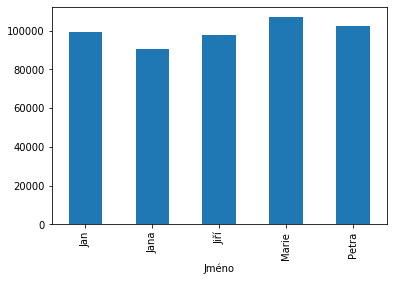

In [20]:
data_frame['Počet'].plot.bar()

In [21]:
print('Nejpopulárnější jména')
data_frame.sort_values(by = 'Počet', ascending = False)

Nejpopulárnější jména


,Počet
Jméno,
Marie,106817
Petra,102319
Jan,99438
Jiří,97826
Jana,90705
